## Data Visualization With Netflix Dataset

By James Lee, Dec 31 2022
Using the dataset from kaggle (https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization)


In [198]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [199]:
# Reading Data
Netflix_data = pd.read_csv(r'C:\Users\jjael\Downloads\netflix.csv')
Netflix_data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [200]:
# Checking for null values in dataset
for col in Netflix_data.columns:
    pct_missing = np.mean(Netflix_data[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

show_id - 0.0%
type - 0.0%
title - 0.0%
director - 0.0%
country - 0.0%
date_added - 0.0%
release_year - 0.0%
rating - 0.0%
duration - 0.0%
listed_in - 0.0%


In [201]:
# Clean show_id Column
Netflix_data['show_id'] = Netflix_data['show_id'].str.replace('s', '').astype(int)

In [202]:
# Clean date_added Column
Netflix_data['year_added'] = Netflix_data['date_added'].str.extract(pat = '([0-9]{4})').astype(int)

In [203]:
# Checking Data Types Of The Columns
Netflix_data.dtypes

show_id          int32
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
year_added       int32
dtype: object

In [204]:
# Search For Duplicates
Netflix_data['title'].value_counts()

9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: title, Length: 8787, dtype: int64

In [205]:
# Drop Duplicate
Netflix_data = Netflix_data.drop_duplicates(subset=['title'])

In [206]:
# Check To See That The Duplicate Dropped Correctly
Netflix_data['title'].value_counts()

Dick Johnson Is Dead                 1
SGT. Will Gardner                    1
Septiembre, un llanto en silencio    1
Set Up                               1
Sex and the City 2                   1
                                    ..
Mercy Black                          1
The Trap                             1
Pinky Memsaab                        1
Love O2O                             1
YOM                                  1
Name: title, Length: 8787, dtype: int64

Text(0, 0.5, 'Count')

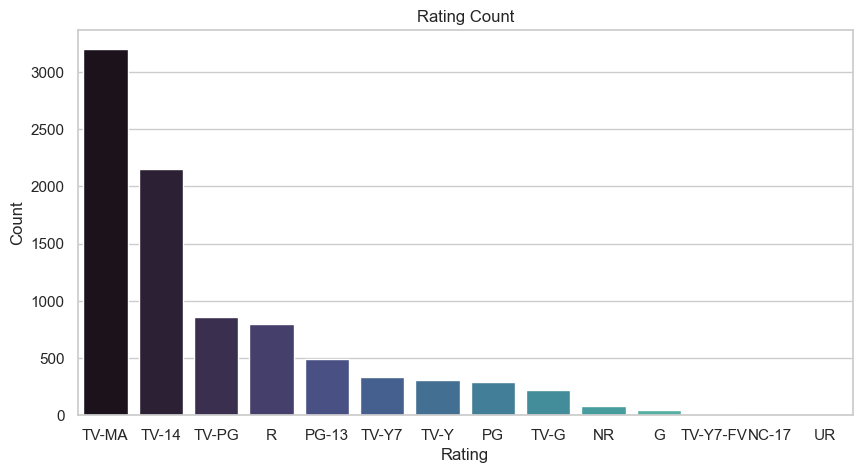

In [207]:
# Countplot on Rating
ax = plt.subplots(figsize = (10,5))
sns.set_theme(style="whitegrid")

ax = sns.countplot(x=Netflix_data['rating'], 
              palette="mako", 
              order = Netflix_data['rating'].value_counts().index, 
              data=Netflix_data)

ax.set_title('Rating Count')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

Text(0.5, 1.0, 'Pie Chart of the Type of Netflix Content')

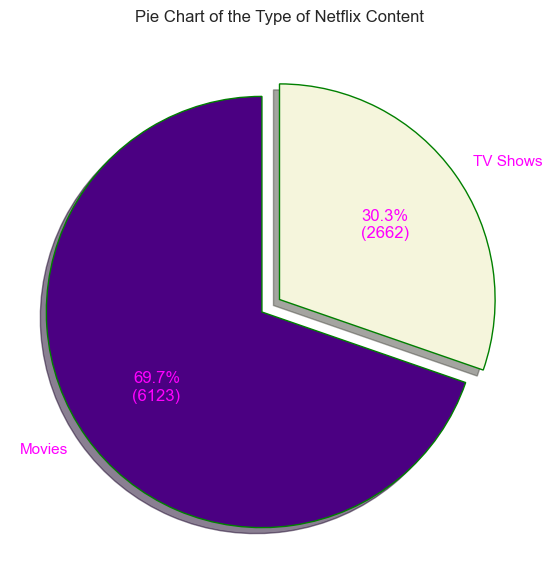

In [208]:
# Pie Chart Of The Type Of Shows On Netflix
data = Netflix_data['type'].value_counts()
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
colors = ( "indigo", "beige")

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize = (10,7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels=['Movies','TV Shows'],
                                  shadow = True,
                                  explode=(0.1,0),
                                  wedgeprops=wp,
                                  startangle = 90,
                                  colors = colors,
                                  textprops = dict(color="magenta"))

ax.set_title('Pie Chart of the Type of Netflix Content')

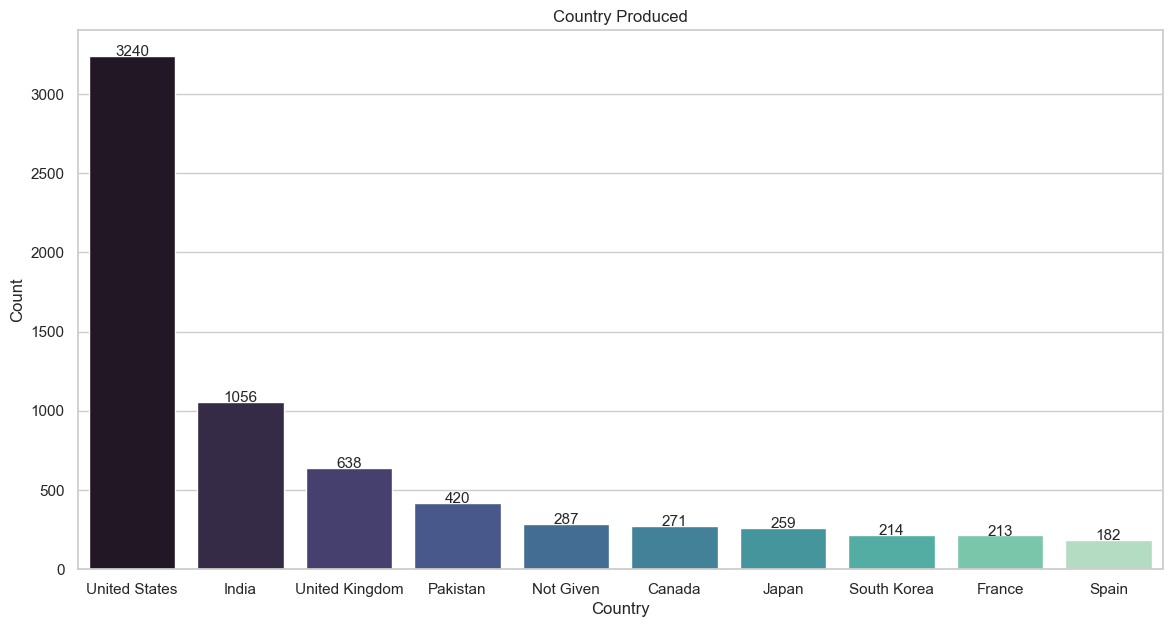

In [209]:
# Countplot Of Country With The Most Produced Content On Netflix
countplt, ax = plt.subplots(figsize = (14,7))
ax = sns.countplot(x=Netflix_data['country'],
                   order = Netflix_data['country'].value_counts().head(10).index, 
                   palette='mako')

ax.set_title('Country Produced')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,
             rect.get_height()+ 0.75,
             rect.get_height(),
             horizontalalignment='center',
             fontsize = 11)

Text(0, 0.5, 'Year')

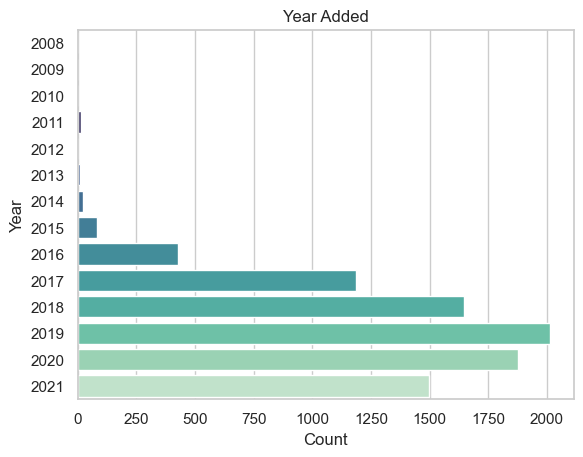

In [210]:
# Count Plot Of The year_added To Netflix
ax = sns.countplot(y=Netflix_data['year_added'], 
                   palette='mako')

ax.set_title('Year Added')
ax.set_xlabel('Count')
ax.set_ylabel('Year')

## Conclusion

- Top 5 Ratings
    1. TV-MA (3205)
    2. TV-14 (2155)
    3. TV-RG (8610)
    4. R     (798)
    5. PG-13 (490)
    
    
- Looking at the Top 2 outstanding ratings on the Netflix dataset, TV-MA with 3000+ contents and TV-14 with 2000+ contents. With this, we can see that Netflix's content is highly focused on TV-MA, programs specifically designed to be viewed by adults. And also TV-14, unsuitable for children under 14 years of age. From the data collected, we could assume that Netflix's target audience is teenagers and young adults.


- The type of content on Netflix has two major types, 69.7% of the content on Netflix is movies, and 30.3% in TV Shows.


- From the count plot, we can see that Netflix has the most movies from the United States, with an outstanding count of 3240 contents. Following up is India with 1056, and United Kingdom with 638. This is reasonable because the main target audience was the United States, and the number of content released will begin to level out once Netflix becomes more global, reaching out to more users around the world.


- From the year-added countplot, we can see there is a steady rise in content added in 2014, from the data we can assume there were more and more newly users on the platform around 2016, which explains the high spike in content added in 2017 and onward.
